In [19]:
import os
import ast
import pandas as pd
import numpy as np
import json
import string
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
DATASET_PATH = os.path.join('D:\\', 'biomedical-datasets', 'cdsr_dataset')
CDSR_ROB_PATH = os.path.join(DATASET_PATH, 'rm5_risk_of_bias.csv')
CDSR_REF_PATH = os.path.join(DATASET_PATH, 'rm5-references.csv')

In [3]:
assert os.path.isfile(CDSR_ROB_PATH), "Arquivo rm5_risk_of_bias.csv não encontrado"
assert os.path.isfile(CDSR_REF_PATH), "Arquivo rm5-references.csv não encontrado"

In [4]:
cdsr_rob_df = pd.read_csv(CDSR_ROB_PATH)
cdsr_ref_df = pd.read_csv(CDSR_REF_PATH)

In [5]:
# filling NaN values from support_judgment column
cdsr_rob_df['support_judgment'].fillna('[]', inplace=True)

In [6]:
cdsr_rob_df['support_judgment'].iloc[0], cdsr_rob_df['support_judgment'].iloc[7],cdsr_rob_df['support_judgment'].iloc[97],   

('Inadequate',
 "{'BR': None, '#text': 'Treatment allocated by block randomisation (block size 10) using validated SAS program (Cary, NC).'}",
 "['1361 women randomised, however, only 908 women required perineal repair and were included in analysis.', 'Intention-to-treat analysis carried out amongst women who received sutures (women were recruited prior to delivery and therefore some women did not require perineal suturing).', '64% of participants were lost to follow up at 6-8 weeks postpartum.']")

In [7]:
ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['BR'].count(None) == len(ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['BR'])

NameError: name '_idx' is not defined

In [ ]:
_idx = 109572
ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['#text'][:124+1] + ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['I'] + ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['#text'][124+1:]

In [ ]:
_idx = 107080
ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['#text'].find('  ')
ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['#text'] + ' ' + ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['LINK']['#text'] 

In [ ]:
_idx = 106948
ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['#text'].find('  ')
ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['#text'] + ' ' + ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['LINK']['#text']

In [ ]:
_idx = 99287
ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['#text'].find('  ')
ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])

In [8]:
_idx = 100170
ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['#text'].find('  ')
ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])

{'SUP': 'a', '#text': 'All outcomes reported or calculated with IPD provided'}

In [9]:
_idx = 100202
print(ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['#text'].find('  '))
print(ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx]))
ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['#text'] + ' ' + ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['LINK']['#text'] + ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['I']

-1
{'LINK': {'@REF': 'STD-Abiose-1993', '@TYPE': 'STUDY', '#text': 'Abiose 1993'}, 'I': ', page 131, first paragraph.', '#text': '"Randomisation to the ivermectin or placebo group was done at the individual level with a blocked design."'}


'"Randomisation to the ivermectin or placebo group was done at the individual level with a blocked design." Abiose 1993, page 131, first paragraph.'

In [10]:
_idx = 100206
print(ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['#text'].find(' ,'))
print(ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx]))


595
{'BR': None, 'LINK': {'@REF': 'STD-Abiose-1993', '@TYPE': 'STUDY', '#text': 'Abiose 1993'}, 'I': 'page 131, first paragraph.', '#text': '"At registration a master card was completed for each individual. It carried identification information, including a photograph, a unique pre-printed identification number, and a pre-printed sequential treatment group number between 1 and 30. Merck, Sharp and Dohme donated 30 identical containers, numbered 1-30, to which ivermectin (6 mg per tablet) or a visually indistinguishable placebo tablet had been randomly allocated. Each participant received tablets from the container with the same number as his or her card.Staff conducting the trial were unaware which containers held ivermectin." ,'}


In [11]:
_idx = 110746
print(ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx]))
print(ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['#text'].find(' ,'))
print(ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['#text'].find('  '))
print(ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['#text'][:54])
print(ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['LINK']['#text'])
print(ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['#text'][54:])

{'LINK': {'@REF': 'REF-Angus-2006', '@TYPE': 'REFERENCE', '#text': 'Angus 2006'}, '#text': 'Follow-up sufficient during the trial period. However,  describes 1-year follow-up of the same trial, and some participants were lost to follow-up. Despite this fact, this is the only trial with long-term follow-up, thus we have labelled it as having complete outcome data'}
-1
54
Follow-up sufficient during the trial period. However,
Angus 2006
  describes 1-year follow-up of the same trial, and some participants were lost to follow-up. Despite this fact, this is the only trial with long-term follow-up, thus we have labelled it as having complete outcome data


In [12]:
_idx = 109584
print(ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx]))
print(ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['#text'].find('  '))
print(ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])['#text'].find('(; )'))

{'I': 'BMC Pulmonary Medicine', 'LINK': [{'@REF': 'STD-Hebestreit-2010', '@TYPE': 'STUDY', '#text': 'Hebestreit 2010'}, {'@REF': 'STD-Kriemler-2013', '@TYPE': 'STUDY', '#text': 'Kriemler 2013'}], '#text': 'All outcome detailed in methods were reported in results except HRQoL (secondary outcome), which was mentioned to be reported separately. In the meantime, study was published as Hebestreit et al.  2014;14:26. HRQoL data were pooled from 2 intervention studies (; ), and results were presented for baseline and 6-month follow-up.'}
195
260


In [14]:
item = ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])
pos_list = []
x = 0
while x != -1:
    x = item['#text'][x:].find('  ')
    if x != -1:
        x += 1
        pos_list.append(x)
        

In [17]:
_idx = 23
support_judgments = []

for _idx in range(cdsr_rob_df.shape[0]):    
    content = ""
    try:
        res = ast.literal_eval(cdsr_rob_df['support_judgment'].iloc[_idx])
        if type(res) is dict:
            if '#text' in res.keys():
                content += res['#text']
        elif type(res) is list:
            try:
                content = "\n".join(res)
            except TypeError:
                for i in res:
                    if type(i) is dict:
                        if '#text' in i.keys():
                            content += i['#text']
                    elif type(i) is str:
                        content += i
                    else:
                        print(i)
        else:
            content = res
    except ValueError as err:
        content = cdsr_rob_df['support_judgment'].iloc[_idx]
    except SyntaxError as err:
        content = cdsr_rob_df['support_judgment'].iloc[_idx]
    support_judgments.append(content)
cdsr_rob_df['support_judgment_str'] = support_judgments

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [49]:
cdsr_rob_df[['name', 'description', 'rob_judgment', 'support_judgment_str']]

,name,description,rob_judgment,support_judgment_str
0,Allocation concealment (selection bias),Selection bias (biased allocation to intervent...,HIGH,Inadequate
1,Allocation concealment (selection bias),Selection bias (biased allocation to intervent...,HIGH,Inadequate
2,Allocation concealment (selection bias),Selection bias (biased allocation to intervent...,HIGH,Inadequate
3,Adequate sequence generation?,Was the allocation sequence adequately generated?,HIGH,Allocated by 'alternating sequence'.
4,Adequate sequence generation?,Was the allocation sequence adequately generated?,UNCLEAR,"Allocated ""randomly to two groups"" - method no..."
...,...,...,...,...
846069,Other bias,Bias due to problems not covered elsewhere in ...,UNCLEAR,
846070,Other bias,Bias due to problems not covered elsewhere in ...,UNCLEAR,
846071,Other bias,Bias due to problems not covered elsewhere in ...,UNCLEAR,
846072,Other bias,Bias due to problems not covered elsewhere in ...,UNCLEAR,


In [42]:
indexes = cdsr_rob_df[cdsr_rob_df['name'].isna()]['name'].reset_index()['index'].values.tolist()
cdsr_rob_df.loc[indexes, 'name'] = cdsr_rob_df.iloc[indexes]['group_description'].values.tolist() 

In [46]:
cdsr_rob_df.to_csv(CDSR_ROB_PATH, index=False)

In [8]:
def remove_punctuation(text):
    return text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))

def tokenize(text):
    if type(text) is not str:
        return []
    tokens = word_tokenize(text)
    return tokens

In [9]:
cdsr_rob_df['name_tkn'] = cdsr_rob_df['name'].apply(tokenize)
cdsr_rob_df['description_tkn'] = cdsr_rob_df['description'].apply(tokenize)
cdsr_rob_df['support_judgment_tkn'] = cdsr_rob_df['support_judgment_str'].apply(tokenize)
cdsr_rob_df['name_count'] = cdsr_rob_df['name_tkn'].apply(len)
cdsr_rob_df['description_count'] = cdsr_rob_df['description_tkn'].apply(len)
cdsr_rob_df['support_judgment_count'] = cdsr_rob_df['support_judgment_tkn'].apply(len)

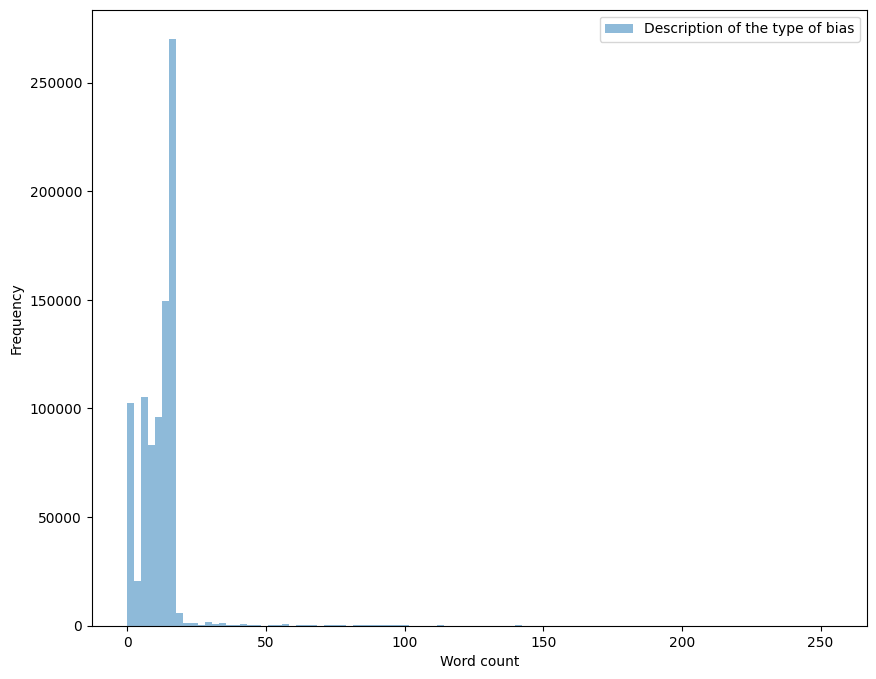

In [10]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
# plot bins
#ax.hist(cdsr_rob_df.name_count, bins=100, alpha=0.5, label='Type of bias')
ax.hist(cdsr_rob_df.description_count, bins=100, alpha=0.5, label='Description of the type of bias')
#ax.hist(cdsr_rob_df.support_judgment_count, bins=100, alpha=0.5, label='Supporting sentence')

ax.set_xlabel('Word count')
ax.set_ylabel('Frequency')
ax.legend(loc='upper right')
plt.show()

In [ ]:
cdsr_rob_df.columns.tolist()

In [7]:
cdsr_rob_df.groupby('id').aggregate({
    'name': list
})

,name
id,
QIT-01,"[Adequate sequence generation?, Adequate seque..."
QIT-02,"[Allocation concealment (selection bias), Allo..."
QIT-03,"[Blinding?, Blinding?, Blinding?, Blinding?, B..."
QIT-04,"[Incomplete outcome data addressed?, Incomplet..."
QIT-05,"[Selective reporting (reporting bias), Selecti..."
QIT-06,"[Free of other bias?, Free of other bias?, Fre..."
QIT-07,[Blinding of participants and personnel (perfo...
QIT-08,[Blinding of outcome assessment (detection bia...
QIT-09,"[Blinding of participants (performance bias), ..."


In [6]:
cdsr_rob_df.id.value_counts()

id
QIT-02    125900
QIT-04    120000
QIT-05    103297
QIT-01    103002
QIT-06     89961
QIT-03     71737
QIT-07     71518
QIT-08     65079
QIT-09     24248
QIT-10     16809
QIT-11     11388
QIT-12      8397
QIT-13      7488
QIT-14      5295
QIT-15      4163
QIT-16      3976
QIT-17      2770
QIT-18      2020
QIT-20      1828
QIT-19      1788
QIT-21      1228
QIT-22       773
QIT-23       569
QIT-24       459
QIT-25       457
QIT-27       362
QIT-28       360
QIT-31       306
QIT-32       278
QIT-26       237
QIT-29       199
QIT-30       182
Name: count, dtype: int64

In [8]:
cdsr_rob_df.groupby('id').aggregate({'name': 'first'})

,name
id,
QIT-01,Adequate sequence generation?
QIT-02,Allocation concealment (selection bias)
QIT-03,Blinding?
QIT-04,Incomplete outcome data addressed?
QIT-05,Selective reporting (reporting bias)
QIT-06,Free of other bias?
QIT-07,Blinding of participants and personnel (perfor...
QIT-08,Blinding of outcome assessment (detection bias)
QIT-09,Blinding of participants (performance bias)


In [9]:
valid_types = cdsr_rob_df.name.value_counts()[:7].reset_index().name.values.tolist()
valid_types

['Incomplete outcome data (attrition bias)',
 'Allocation concealment (selection bias)',
 'Random sequence generation (selection bias)',
 'Selective reporting (reporting bias)',
 'Blinding of outcome assessment (detection bias)',
 'Other bias',
 'Blinding of participants and personnel (performance bias)']

In [11]:
cdsr_rob_df[cdsr_rob_df.name.isin(valid_types)]

,review,id,name,description,core_item,level,no,study_id,study_name,group_id,group_description,rob_judgment,support_judgment,support_judgment_str
0,D:\biomedical-datasets\cdsr_dataset\rm5\CD0000...,QIT-02,Allocation concealment (selection bias),Selection bias (biased allocation to intervent...,True,STUDY,2,STD-Blecher-1967,Blecher 1967,NaN,NaN,HIGH,Inadequate,Inadequate
1,D:\biomedical-datasets\cdsr_dataset\rm5\CD0000...,QIT-02,Allocation concealment (selection bias),Selection bias (biased allocation to intervent...,True,STUDY,2,STD-MacRae-1971,MacRae 1971,NaN,NaN,HIGH,Inadequate,Inadequate
2,D:\biomedical-datasets\cdsr_dataset\rm5\CD0000...,QIT-02,Allocation concealment (selection bias),Selection bias (biased allocation to intervent...,True,STUDY,2,STD-Varma-1973,Varma 1973,NaN,NaN,HIGH,Inadequate,Inadequate
189,D:\biomedical-datasets\cdsr_dataset\rm5\CD0000...,QIT-01,Random sequence generation (selection bias),Selection bias (biased allocation to intervent...,True,STUDY,1,STD-Antoniou-2005,Antoniou 2005,NaN,NaN,UNCLEAR,randomized in a 2:1 manner,randomized in a 2:1 manner
190,D:\biomedical-datasets\cdsr_dataset\rm5\CD0000...,QIT-01,Random sequence generation (selection bias),Selection bias (biased allocation to intervent...,True,STUDY,1,STD-Aycicegi_x002d_Dinn-2011,Aycicegi_x002d_Dinn 2011,NaN,NaN,HIGH,"""we were forced to match participants on two k...",we were forced to match participants on two ke...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846069,D:\biomedical-datasets\cdsr_dataset\rm5\CD0154...,QIT-07,Other bias,Bias due to problems not covered elsewhere in ...,True,STUDY,7,STD-Walsh-2020,Walsh 2020,NaN,NaN,UNCLEAR,[],NaN
846070,D:\biomedical-datasets\cdsr_dataset\rm5\CD0154...,QIT-07,Other bias,Bias due to problems not covered elsewhere in ...,True,STUDY,7,STD-Wu-2021a,Wu 2021a,NaN,NaN,UNCLEAR,[],NaN
846071,D:\biomedical-datasets\cdsr_dataset\rm5\CD0154...,QIT-07,Other bias,Bias due to problems not covered elsewhere in ...,True,STUDY,7,STD-Xia-2020,Xia 2020,NaN,NaN,UNCLEAR,[],NaN
846072,D:\biomedical-datasets\cdsr_dataset\rm5\CD0154...,QIT-07,Other bias,Bias due to problems not covered elsewhere in ...,True,STUDY,7,STD-Xia-2021,Xia 2021,NaN,NaN,UNCLEAR,[],NaN


In [15]:
risk = 'HIGH'
cdsr_rob_df[(cdsr_rob_df.rob_judgment == risk) & (cdsr_rob_df.name.isin(valid_types))].name.value_counts()

name
Blinding of participants and personnel (performance bias)    25829
Incomplete outcome data (attrition bias)                     17863
Blinding of outcome assessment (detection bias)              15795
Selective reporting (reporting bias)                         12868
Other bias                                                   10218
Allocation concealment (selection bias)                       6879
Random sequence generation (selection bias)                   4773
Name: count, dtype: int64

In [17]:
risk = 'UNCLEAR'
cdsr_rob_df[(cdsr_rob_df.rob_judgment == risk) & (cdsr_rob_df.name.isin(valid_types))].name.value_counts()

name
Allocation concealment (selection bias)                      60609
Random sequence generation (selection bias)                  46631
Blinding of outcome assessment (detection bias)              35971
Incomplete outcome data (attrition bias)                     32822
Selective reporting (reporting bias)                         32514
Other bias                                                   26326
Blinding of participants and personnel (performance bias)    23654
Name: count, dtype: int64

In [18]:
risk = 'LOW'
cdsr_rob_df[(cdsr_rob_df.rob_judgment == risk) & (cdsr_rob_df.name.isin(valid_types))].name.value_counts()

name
Incomplete outcome data (attrition bias)                     57910
Random sequence generation (selection bias)                  44889
Selective reporting (reporting bias)                         43885
Other bias                                                   40193
Allocation concealment (selection bias)                      33842
Blinding of outcome assessment (detection bias)              30969
Blinding of participants and personnel (performance bias)    22113
Name: count, dtype: int64

In [20]:
def split_stratified_into_train_val_test(df_input, stratify_colname='y',
                                         frac_train=0.6, frac_val=0.2, frac_test=0.2,
                                         random_state=None):
    '''
    Splits a Pandas dataframe into three subsets (train, val, and test)
    following fractional ratios provided by the user, where each subset is
    stratified by the values in a specific column (that is, each subset has
    the same relative frequency of the values in the column). It performs this
    splitting by running train_test_split() twice.

    Parameters
    ----------
    df_input : Pandas dataframe
        Input dataframe to be split.
    stratify_colname : str
        The name of the column that will be used for stratification. Usually
        this column would be for the label.
    frac_train : float
    frac_val   : float
    frac_test  : float
        The ratios with which the dataframe will be split into train, val, and
        test data. The values should be expressed as float fractions and should
        sum to 1.0.
    random_state : int, None, or RandomStateInstance
        Value to be passed to train_test_split().

    Returns
    -------
    df_train, df_val, df_test :
        Dataframes containing the three splits.
    '''

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError('fractions %f, %f, %f do not add up to 1.0' % \
                         (frac_train, frac_val, frac_test))

    if stratify_colname not in df_input.columns:
        raise ValueError('%s is not a column in the dataframe' % (stratify_colname))

    X = df_input # Contains all columns.
    y = df_input[[stratify_colname]] # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(X,
                                                          y,
                                                          stratify=y,
                                                          test_size=(1.0 - frac_train),
                                                          random_state=random_state)

    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(df_temp,
                                                      y_temp,
                                                      stratify=y_temp,
                                                      test_size=relative_frac_test,
                                                      random_state=random_state)

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test

In [24]:
df_train, df_val, df_test = split_stratified_into_train_val_test(cdsr_rob_df[cdsr_rob_df.name.isin(valid_types)], stratify_colname='rob_judgment', random_state=28971987)

In [25]:
df_train.shape, df_val.shape, df_test.shape

((375931, 14), (125311, 14), (125311, 14))

In [26]:
df_train

,review,id,name,description,core_item,level,no,study_id,study_name,group_id,group_description,rob_judgment,support_judgment,support_judgment_str
177274,D:\biomedical-datasets\cdsr_dataset\rm5\CD0037...,QIT-09,Blinding of outcome assessment (detection bias),Detection bias due to knowledge of the allocat...,False,GROUP,9,STD-Wijkstra-1994,Wijkstra 1994,QIG-09.01,All outcomes,HIGH,Not blinded,Not blinded
1481,D:\biomedical-datasets\cdsr_dataset\rm5\CD0000...,QIT-08,Blinding of outcome assessment (detection bias),Detection bias due to knowledge of the allocat...,False,GROUP,8,STD-Wolever-2010,Wolever 2010,QIG-08.02,Patient outcome,LOW,(PRIMARY) A1C - This is an objective outcome a...,(PRIMARY) A1C - This is an objective outcome a...
410065,D:\biomedical-datasets\cdsr_dataset\rm5\CD0075...,QIT-01,Random sequence generation (selection bias),Selection bias (biased allocation to intervent...,True,STUDY,1,STD-Hodge-2014,Hodge 2014,NaN,NaN,LOW,Probably done: further information received fr...,Probably done: further information received fr...
198521,D:\biomedical-datasets\cdsr_dataset\rm5\CD0040...,QIT-06,Other bias,Bias due to problems not covered elsewhere in ...,True,STUDY,6,STD-Jun-2011,Jun 2011,NaN,NaN,LOW,Not reported,Not reported
832093,D:\biomedical-datasets\cdsr_dataset\rm5\CD0146...,QIT-06,Other bias,Bias due to problems not covered elsewhere in ...,True,STUDY,6,STD-Deligiannis-1999a,Deligiannis 1999a,NaN,NaN,UNCLEAR,Insufficient information to permit judgement,Insufficient information to permit judgement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737249,D:\biomedical-datasets\cdsr_dataset\rm5\CD0127...,QIT-05,Incomplete outcome data (attrition bias),"Attrition bias due to amount, nature or handli...",True,GROUP,5,STD-Seol-2016,Seol 2016,QIG-05.01,Subjective outcomes (Patient reported outcomes),HIGH,"['Quote: ""three hundred thirty-three cycles we...","Quote: ""three hundred thirty-three cycles were..."
573209,D:\biomedical-datasets\cdsr_dataset\rm5\CD0104...,QIT-04,Blinding of outcome assessment (detection bias),Detection bias due to knowledge of the allocat...,True,GROUP,4,STD-Notelovitz-2000a,Notelovitz 2000a,QIG-04.01,All outcomes,LOW,"Author reported that ""...serum samples collect...","Author reported that ""...serum samples collect..."
561855,D:\biomedical-datasets\cdsr_dataset\rm5\CD0102...,QIT-07,Other bias,Bias due to problems not covered elsewhere in ...,True,STUDY,7,STD-McRobbie-2015,McRobbie 2015,NaN,NaN,UNCLEAR,[],NaN
191291,D:\biomedical-datasets\cdsr_dataset\rm5\CD0039...,QIT-01,Random sequence generation (selection bias),Selection bias (biased allocation to intervent...,True,STUDY,1,STD-Baker-1998,Baker 1998,NaN,NaN,UNCLEAR,Patients were identified as being eligible for...,Patients were identified as being eligible for...
